<a href="https://colab.research.google.com/github/piyushparsai/coep_emtech/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

**Load and describe dataset**

In [2]:
dataset = pd.read_csv('/content/temperatures.csv')

FileNotFoundError: ignored

In [ ]:
dataset.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [ ]:
dataset.isna().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [ ]:
dataset.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [ ]:
dataset.shape

(117, 18)

In [ ]:
print(dataset.head())
print(dataset.tail())

   YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47  29.97   
1  1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80  29.12   
2  1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85  29.04   
3  1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04  29.20   
4  1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12  30.67   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2  26.08  23.65   28.47    24.24    30.71    30.92    26.26  
3  26.36  23.63   28.49    23.62    30.95    30.66    26.40  
4  27.52  23.82   28.30    22.25    30.00    31.33    26.57  
     YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
112  2013  24.56  26.59  30.62  32.66  34.46  32.44  31.07  30.76

**Prepare data for training**

In [ ]:
year = np.array(dataset['YEAR'])
year2d_train = year.reshape((-1, 1))
year2d_train

array([[1901],
       [1902],
       [1903],
       [1904],
       [1905],
       [1906],
       [1907],
       [1908],
       [1909],
       [1910],
       [1911],
       [1912],
       [1913],
       [1914],
       [1915],
       [1916],
       [1917],
       [1918],
       [1919],
       [1920],
       [1921],
       [1922],
       [1923],
       [1924],
       [1925],
       [1926],
       [1927],
       [1928],
       [1929],
       [1930],
       [1931],
       [1932],
       [1933],
       [1934],
       [1935],
       [1936],
       [1937],
       [1938],
       [1939],
       [1940],
       [1941],
       [1942],
       [1943],
       [1944],
       [1945],
       [1946],
       [1947],
       [1948],
       [1949],
       [1950],
       [1951],
       [1952],
       [1953],
       [1954],
       [1955],
       [1956],
       [1957],
       [1958],
       [1959],
       [1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [19

In [ ]:
months_train = dataset.loc[:,'JAN':'DEC']
months_train

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49
1,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04
2,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65
3,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63
4,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82
...,...,...,...,...,...,...,...,...,...,...,...,...
112,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37
113,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08
114,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67
115,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01


Import and train linear regression model

In [ ]:
regr = LinearRegression()

In [ ]:
regr.fit(year2d_train, months_train)


LinearRegression()

**Perform predication for 1901, 2001 and 2050**



In [ ]:
year_test = np.array([1901, 2001, 2050])
year_test2d = year_test.reshape((-1, 1))
year_test2d

array([[1901],
       [2001],
       [2050]])

In [ ]:
monthly_temp_pred = regr.predict(year_test2d)
monthly_temp_pred

array([[22.86613646, 24.3246038 , 28.07403158, 31.15348254, 33.0599971 ,
        32.3717094 , 30.65229465, 29.97491525, 29.86874692, 29.05594669,
        26.43279733, 23.62836883],
       [24.28216997, 26.51987871, 29.81877525, 32.57129189, 33.93120752,
        33.06578544, 31.31367876, 30.89349638, 30.93427315, 30.2811786 ,
        27.90292277, 25.31788912],
       [24.97602639, 27.59556342, 30.67369964, 33.26601847, 34.35810063,
        33.4058827 , 31.63775697, 31.34360113, 31.45638101, 30.88154223,
        28.62328423, 26.14575407]])

**Display results**

Display predictions in tabular form

In [ ]:
result_data = pd.DataFrame(data=monthly_temp_pred, index=year_test, columns=dataset.columns[1:13:])
result_data

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
1901,22.866136,24.324604,28.074032,31.153483,33.059997,32.371709,30.652295,29.974915,29.868747,29.055947,26.432797,23.628369
2001,24.282170,26.519879,29.818775,32.571292,33.931208,33.065785,31.313679,30.893496,30.934273,30.281179,27.902923,25.317889
2050,24.976026,27.595563,30.673700,33.266018,34.358101,33.405883,31.637757,31.343601,31.456381,30.881542,28.623284,26.145754


Plot the predictions using metplotlib

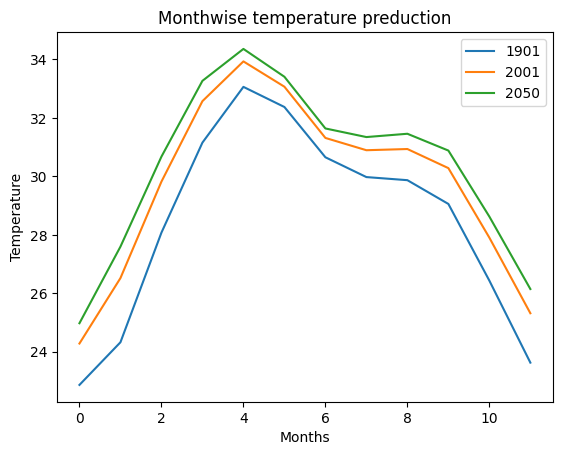

In [ ]:
from matplotlib import pyplot as plt
plt.title("Monthwise temperature preduction")
plt.xlabel("Months")
plt.ylabel("Temperature")

for month in monthly_temp_pred:
  plt.plot(month)

plt.legend(year_test)
plt.show()




Accuracy: 0.84


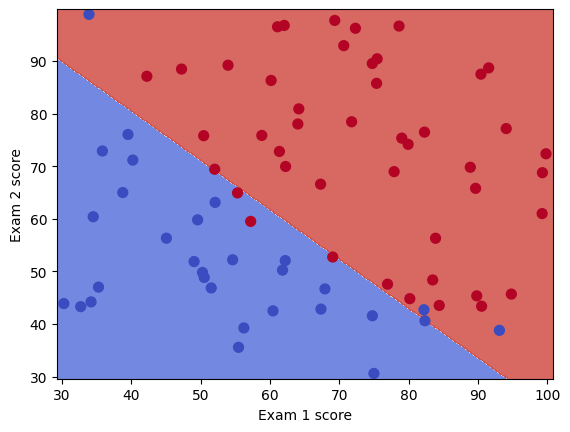

In [16]:
# prompt: build logistic regression model to predict whether a student gets admitted into a university. Load data from ex2data1.txt. To build a logistic regression model to predict whether a student gets admitted into a university.  Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams.  I. You have historical data from previous applicants that you can use as a training set for logistic regression.  II. For each training example, you have the applicant’s scores on two exams and the admissions decision.  III. Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('/content/ex2data1.txt', header=None)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 0:2], data.iloc[:, 2], test_size=0.25)

# Create a logistic regression model
model = lm.LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Plot the decision boundary
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 500), np.linspace(x2_min, x2_max, 500))
y_pred = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_pred = y_pred.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_pred, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=50, cmap=plt.cm.coolwarm)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()


In [17]:
# prompt: print the first five values of X_train and Y_train. Print the type of the variable and print the first five values.




            0          1
15  53.971052  89.207350
92  55.482161  35.570703
70  32.722833  43.307173
90  94.094331  77.159105
4   79.032736  75.344376
15    1
92    0
70    0
90    1
4     1
Name: 2, dtype: int64


ValueError: ignored

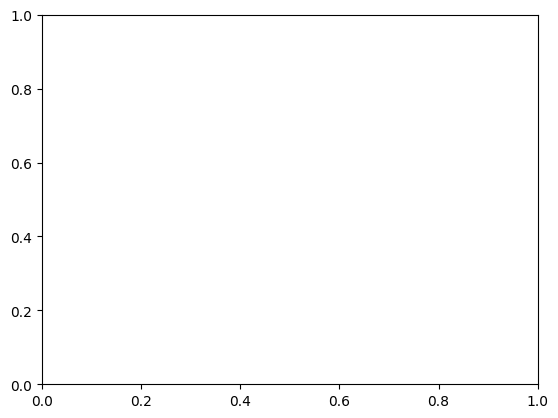

In [19]:
# prompt: Visualize data by using a scatter plot
data = pd.read_csv('/content/ex2data1.txt', header=None)
plt.scatter(X_train, y_train)


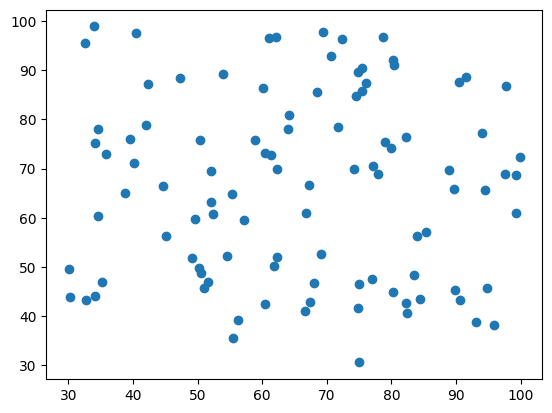

In [20]:
# prompt: Load data from ex2data1.txt and print its scatter plot

data = pd.read_csv('/content/ex2data1.txt', header=None)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1])
